# Modeling and Simulation 3 - Data Compression

In computer science, data encoding refers to the process of converting data from one format to another. This is often done to optimize data storage, transmission, or processing. Data encoding can involve various techniques such as compression, encryption, and conversion of data between different character sets.

Data encryption is a type of data encoding that is used to secure data by converting it into a form that can only be deciphered by authorized parties. This is often done to protect sensitive information such as passwords, credit card numbers, or confidential business data.

Data encoding can also involve converting data between different character sets. For example, ASCII encoding is a way of representing text using a standard set of 128 characters, while Unicode encoding allows for the representation of characters from many different languages and scripts.

Data compression is a form of data encoding that reduces the size of data without losing any important information. This is typically done to optimize storage capacity, reduce transmission time over a network, or improve processing efficiency.


Data compression has many applications in computer science. For example, it can be used to reduce the size of files for storage on a hard drive or other storage media. It can also be used to reduce the amount of data that needs to be transmitted over a network, which can be particularly important in situations where bandwidth is limited.

There are two main types of data compression: 
- Lossless compression and lossy compression. Lossless compression is a technique that reduces the size of data without any loss of information. This is typically done by removing redundant data or patterns in the data. Examples of lossless compression algorithms include ZIP, GZIP, and BZIP2.

- Lossy compression, on the other hand, is a technique that reduces the size of data by discarding some information that is deemed to be less important. This can result in a smaller file size, but it may also result in a reduction in the quality of the data. Examples of lossy compression algorithms include JPEG for images and MP3 for audio.


## Huffman Coding

Lossless compression is a technique in computer science that reduces the size of data without any loss of information. There are several methods for achieving lossless compression, including run-length encoding, arithmetic coding, and Huffman coding.

Huffman coding is a popular technique for lossless data compression that is widely used in many applications such as image and audio compression. It is a variable-length code that assigns shorter bit sequences to more frequently occurring characters and longer bit sequences to less frequently occurring characters.

The Huffman encoding process involves several steps:

1. Frequency Analysis: The frequency of occurrence of each character in the input data is analyzed.

2. Build Huffman Tree: A binary tree is constructed based on the frequency of occurrence of each character. The tree is built using a greedy algorithm that minimizes the total encoding length of the data.

3. Assign Codes: Each leaf node of the Huffman tree is assigned a unique bit pattern that represents the character it corresponds to. The bit pattern for each character is obtained by traversing the tree from the root to the leaf node.

4. Encode Data: The input data is encoded using the bit patterns assigned to each character in the Huffman tree. This produces a compressed version of the data that can be stored or transmitted.

The algorithm begins with building a binary tree, known as a Huffman tree, that represents the frequency of each symbol in the message. The tree is built recursively by merging the two least frequent symbols into a single node until all the symbols are combined into a single root node. The left child of each internal node represents the symbol with the higher frequency, while the right child represents the symbol with the lower frequency.

Once the Huffman tree is constructed, a code is assigned to each symbol based on its position in the tree. Starting from the root node, traversing left or right represents a binary 0 or 1, respectively. The code assigned to each symbol is the path from the root node to that symbol in the tree. As a result, symbols with higher frequency are assigned shorter codes, while symbols with lower frequency are assigned longer codes.

The final code is generated by replacing each symbol in the original message with its assigned code. The encoded message is a concatenation of these codes. To decode the message, the Huffman tree is reconstructed using the same frequency information used to build it, and the encoded message is traversed through the tree to find the corresponding symbols.

The main advantage of Huffman coding is its ability to produce efficient compression with a low computational overhead. Because the encoding is based on the frequency of occurrence of characters in the data, it is particularly effective for compressing text-based data such as documents and emails.

However, the compression ratio achieved by Huffman coding depends heavily on the frequency distribution of characters in the input data. If the input data has a uniform distribution of characters, Huffman coding may not be very effective. In such cases, other compression algorithms may be more suitable.

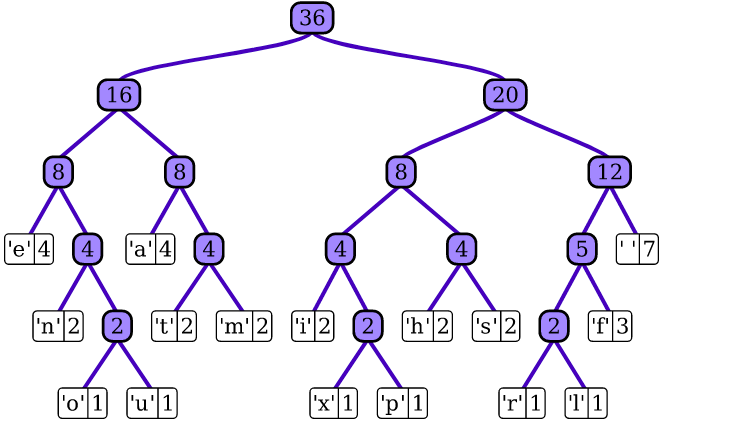

The tree resulting from encoding "this is an example of a huffman tree" using Huffman codes.

### Task 1: Encode and Decode using Huffman codes

In [153]:
# This class is used to represent nodes in the Huffman tree,  which is a binary tree used in Huffman encoding. 
# Each node has a frequency count (freq), an optional symbol (symbol), and two child nodes (left and right). 
# The is_leaf() method is used to check if a node is a leaf node (i.e., has no children).
class HuffmanNode:
    def __init__(self, freq, symbol=None):
        self.left = None
        self.right = None
        self.freq = freq
        self.symbol = symbol

    def is_leaf(self):
        return self.left is None and self.right is None

# This function takes a dictionary (freq_map) containing character frequencies and uses it to build a Huffman tree. 
# The function first creates a list of leaf nodes (one for each character in the frequency map), 
#     then repeatedly merges the two nodes with the lowest frequencies into a single parent node, 
#     until there is only one node left, which is the root of the Huffman tree.
def build_huffman_tree(freq_map):
    # TODO Create the nodes
    nodes = []

    # TODO Merge the nodes with the lowest frequencies to construct the tree

    # In the end you should only have one element in the `nodes` list, the root
    return nodes[0]

# This recursive function is used to traverse the Huffman tree and build a code map, 
#      which is a dictionary that maps each symbol in the input text to its corresponding Huffman code. 
# The function recursively traverses the tree, adding a '0' to the current code for each left child, 
#      and a '1' for each right child. When a leaf node is reached, the current code is added to the code map 
#      for the symbol represented by the leaf node.
def traverse_huffman_tree(root, code_map, current_code=''):
    if root is None:
        return
    # TODO If a leaf is reached, assign the code, else continue traversing


def huffman_encode(text):
    freq_map = {}
    # TODO Populate the frequency map
    root = build_huffman_tree(freq_map)
    code_map = {}
    traverse_huffman_tree(root, code_map)
    # TODO Construct the encoded representation of `text` using the code_map
    return encoded, code_map


def huffman_decode(encoded, code_map):
    # TODO Construct the dictionary which maps the codes to the original symbols using the code_map
    reverse_code_map = {}
    current_code = ''
    decoded = []
    # TODO Iterate through the bits in the encoded message, and check for matches in the reverse_code_map
    # Due to the nature of Huffman coding, only complete matches can occur, no need to worry about partial matches
    
    # TODO Return the decoded message
    return ''

In [ ]:
data = 'hello world'

encoded_data_huff, encoding_dict = huffman_encode(data)
print(encoded_data_huff)
decoded_data_huff = huffman_decode(encoded_data_huff, encoding_dict)
print(decoded_data_huff)

The correct encoding should be: 11101111101011000000111001010011

While Huffman coding is a popular and efficient technique for lossless data compression, it has several drawbacks and limitations that should be considered when choosing a compression algorithm.

1. Encoding and decoding complexity: The Huffman encoding process requires constructing a frequency tree, assigning codes to each character, and encoding the input data using those codes. Similarly, the decoding process requires traversing the Huffman tree to reconstruct the original data. While these steps can be performed efficiently, they still add some computational overhead that can be a concern in certain applications.

2. Compression ratio limitations: Huffman coding works best when the input data has a non-uniform frequency distribution of characters, allowing for more efficient encoding of the most frequently occurring characters. However, when the input data has a relatively uniform distribution, Huffman coding may not achieve significant compression. In addition, Huffman coding may not be optimal for encoding data with complex structures, such as images or video.

3. Lack of error tolerance: Huffman coding is a lossless compression technique, which means that the original data can be perfectly reconstructed from the compressed data. However, this also means that any errors introduced during transmission or storage can completely corrupt the compressed data and render it unusable. In contrast, some lossy compression techniques, such as JPEG or MP3, are more tolerant to errors and can still produce acceptable output even when some data is lost or corrupted.

4. Need for adaptive encoding: The Huffman encoding process requires knowing the frequency distribution of characters in the input data beforehand, which may not always be possible or practical. In some cases, an adaptive encoding approach may be more appropriate, where the encoding algorithm updates its character frequency estimates dynamically as it encounters new data.

## N-gram Encoding

Lossy data compression techniques are methods used to reduce the size of data by discarding some information that is deemed unnecessary for the intended use of the data. These techniques work by identifying and removing redundancies or patterns in the data, which can result in a significant reduction in the size of the compressed data.

In natural language processing, an n-gram is a contiguous sequence of n items (words, letters, or phonemes) within a text. For example, given the sentence "The quick brown fox jumps over the lazy dog", some 2-grams (also called bigrams) would be "The quick", "quick brown", "brown fox", "fox jumps", "jumps over", "over the", "the lazy", and "lazy dog". Similarly, some 3-grams (trigrams) would be "The quick brown", "quick brown fox", "brown fox jumps", "fox jumps over", "jumps over the", "over the lazy", and "the lazy dog". N-grams are widely used in natural language processing for language modeling, text classification, and machine translation, among other tasks.


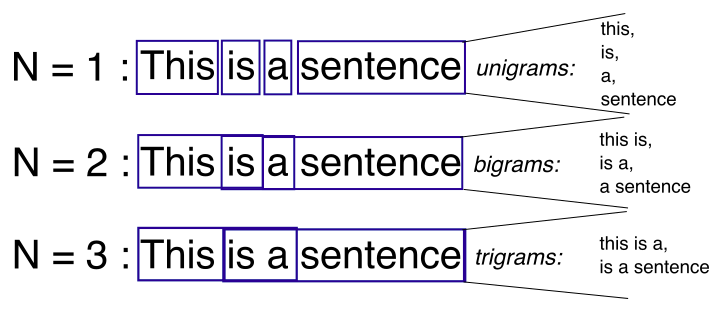

[N-gram dictionary compression](https://www.hindawi.com/journals/cin/2016/9483646/) is a specific type of lossy data compression technique that works by creating a dictionary of frequently occurring sequences of characters or words, called n-grams. This dictionary is used to replace the original sequences in the data with a shorter index, resulting in a reduction in the overall size of the data. However, since this technique discards some information, it is considered a lossy compression technique.

The degree of information loss in lossy compression techniques can vary depending on the specific technique used, the compression level selected, and the nature of the data being compressed. In some cases, the loss of information may not be noticeable or may not significantly affect the intended use of the data. In other cases, the loss of information may be significant and may affect the quality or integrity of the data.

N-gram dictionary compression is a lossy data compression technique that works by creating a dictionary of frequently occurring sequences of characters or words, called n-grams. The n-gram dictionary is created by analyzing the input data and identifying frequently occurring sequences of n consecutive characters or words. The n-grams are then assigned a unique index or code and stored in the dictionary.

To compress the data, each n-gram in the input data is replaced with its corresponding index from the dictionary. This process effectively reduces the size of the data by replacing long sequences of characters or words with shorter codes. The compressed data is then stored or transmitted using the compressed representation, which requires less storage space or transmission bandwidth.

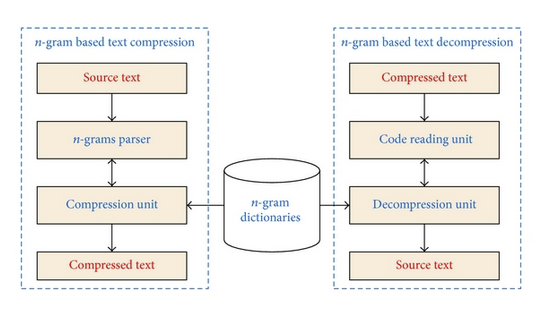

The degree of compression achieved using n-gram dictionary compression depends on several factors, including the length of the n-grams used, the frequency of the n-grams in the input data, and the size of the dictionary. In general, longer n-grams can capture more context and result in higher compression ratios, but they are less likely to occur frequently in the input data. On the other hand, shorter n-grams may result in lower compression ratios, but they are more likely to occur frequently in the input data.

One of the advantages of n-gram dictionary compression is its simplicity and efficiency. The compression and decompression processes are relatively fast and require minimal computational resources. This makes it suitable for use in applications with limited resources, such as mobile devices or embedded systems.

However, one of the main drawbacks of n-gram dictionary compression is the loss of information that occurs during compression. Since the technique works by replacing sequences of characters or words with shorter codes, some information is inevitably lost in the process. The degree of information loss depends on several factors, including the size of the dictionary, the length of the n-grams used, and the nature of the input data. Therefore, n-gram dictionary compression is most suitable for applications where some loss of information is acceptable, such as text or speech data.

In [150]:
def encode_ngram(text, n):
    model = {} 
    encoded_text = []
    for i in range(len(text) - n + 1):  # Loop over all possible n-grams in the text
        # TODO Extract the n-gram at the current position
        ngram = ""
        if ngram not in model:  
            # TODO If the n-gram is not already in the model dictionary assign an integer value to it (as small as possible) and store it in the model
        
        # TODO Append the integer representation of the current n-gram to the encoded text
    return encoded_text, model  # Return the encoded text and the n-gram to integer model dictionary

def decode_ngram(n, encoded_text, model):
    decoded_text = ""
    # TODO Create an inverse model to map integer representations back to n-grams
    inverse_model = {}
    for i in range(0, len(encoded_text)):  # Loop over all integers in the encoded text
        ngram = inverse_model[encoded_text[i]]  # Look up the corresponding n-gram for the current integer
        # TODO Reconstruct the part of the text using the ngram
        
    return decoded_text  # Return the decoded text

In [ ]:
# Define the input data and frequency table
n = 2

encoded_data_ngram, model = encode_ngram(data, n)
print(encoded_data_ngram)

decoded_data_ngram = decode_ngram(n, encoded_data_ngram, model)
print(decoded_data_ngram)

There are several disadvantages of n-gram dictionary encoding:

- Memory requirements: n-gram dictionary encoding requires storing the entire dictionary, which can be memory-intensive for large datasets. As n increases, the number of possible n-grams grows exponentially, which can lead to memory limitations.

- Lossy compression: n-gram dictionary encoding is a lossy compression technique, meaning that some information is lost in the compression process. This can result in a loss of accuracy in certain applications, particularly for tasks that require precise text representations.

- Limited context: n-gram models only consider the context of the current n-gram, which may not capture longer-range dependencies or contextual information in the text. This can lead to inaccurate or incomplete representations of the input text.

- Generalization: n-gram models can struggle to generalize to unseen data or novel contexts, particularly if the training data is limited or biased. This can limit the utility of n-gram models in certain applications.

Now, let's compare the compression performance of the two methods:

In [ ]:
import math

# TODO Compute the ratio of the bits required for the compressed data / original data
def compression_ratio(data, compressed_data):
    return 1

# Example usage
ratio = compression_ratio(data, encoded_data_huff)
print(f"Compression ratio Huffman: {ratio:.2f}")

# Compression ratio for n-gram dictionary compression
ratio = compression_ratio(data, encoded_data_ngram)
print(f"Compression ratio n-gram: {ratio:.2f}")